In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.transforms as mtransforms
plt.rc('font',family='Times New Roman')

name = ['NIKKEI.csv', 'HANGSENG.csv', 'SENSEX.csv', 'SP500.csv', 'KOSPI.csv', 'SSE.csv', 'EURONEXT.csv']

In [5]:
def vol_graph(name):
	for i in range(len(name)):
		df = pd.read_csv(name[i], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
		df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns', inplace=True)
		df.rename(columns={'Close': 'Волатильність (стандартне відхилення)'}, inplace=True)
		df = df.pct_change(1)
		std = df.rolling(20).std(ddof=0)
		state = pd.cut(std['Волатильність (стандартне відхилення)'], bins=[-np.inf, std['Волатильність (стандартне відхилення)'].mean(), 1.25*std['Волатильність (стандартне відхилення)'].mean(), \
			1.5*std['Волатильність (стандартне відхилення)'].mean(), np.inf], labels=range(4))
		cmap = plt.get_cmap('RdYlGn_r')
		std.plot(color='black', figsize = (10,4), linewidth=1.5, marker='', legend=False)
		ax = plt.gca()  
		axes = plt.gca()
		axes.set_ylim([0,0.088])
		ax.set_xlim(left=std.index[0], right=std.index[-1])
		ax.set_ylabel('Волатильність (ст. відхилення)', {'fontname':'Times New Roman'})
		ax.set_xlabel('Дата', {'fontname':'Times New Roman'})
		index_name = ''
		for j in range(len(name[i])-4):
			index_name = index_name + name[i][j]
		for tick in ax.get_xticklabels():
			tick.set_fontname("Times New Roman")
		for tick in ax.get_yticklabels():
			tick.set_fontname("Times New Roman")
		ax.grid(False)
		trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
		for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
		    ax.fill_between(std.index, 0, 1, where=state == i,facecolor=color, transform=trans)
		graph_name = 'vol'+str(index_name)
		plt.show()
		plt.close()

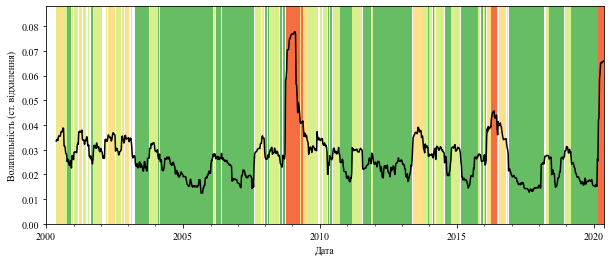

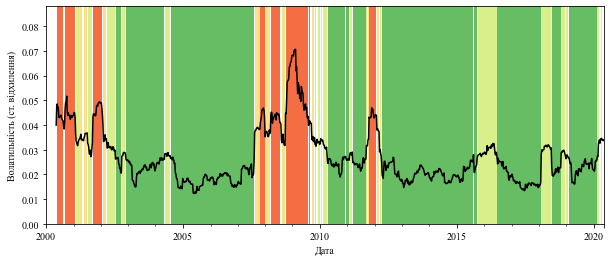

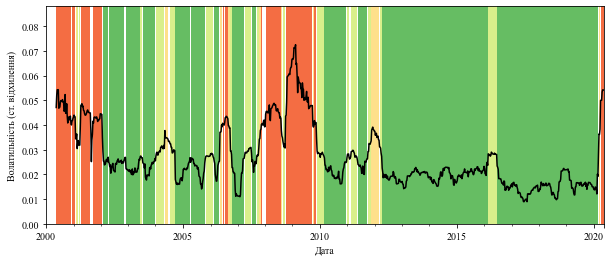

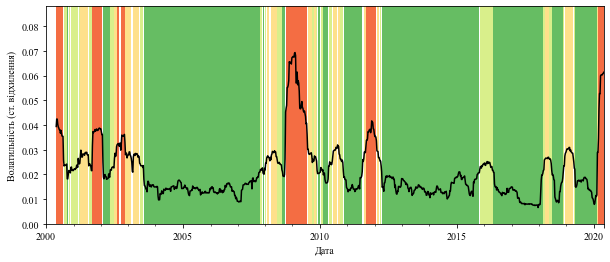

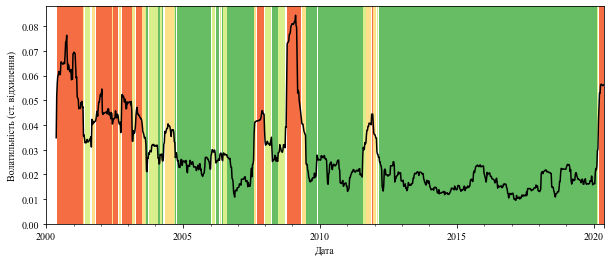

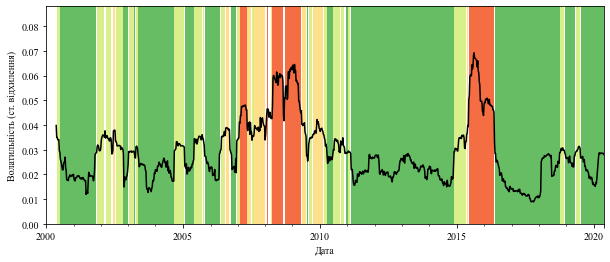

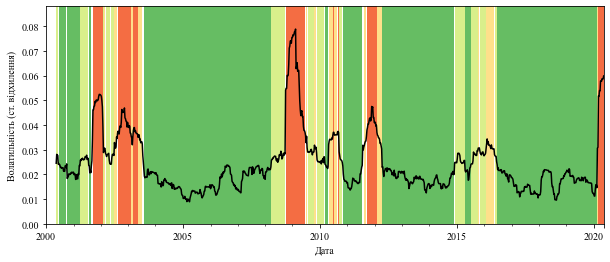

In [6]:
vol_graph(name)